In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

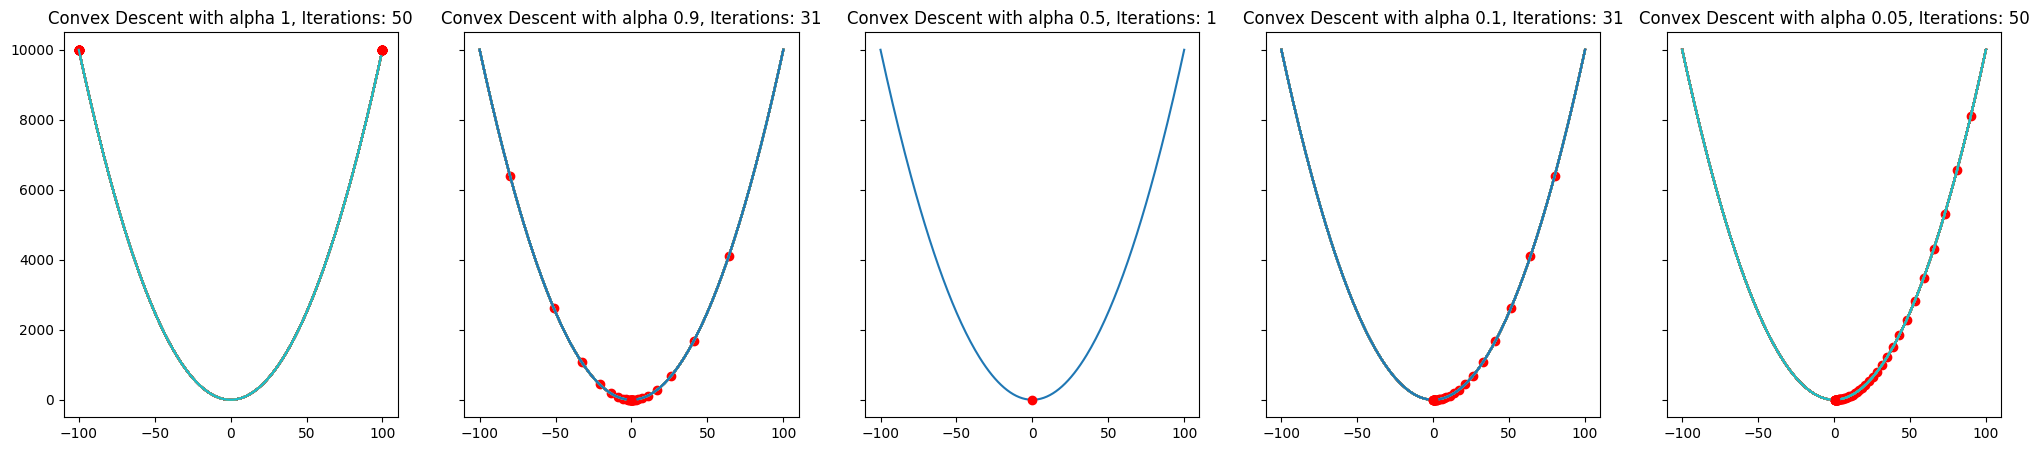

In [11]:
def arbituary(x, f = lambda x: x**2):
    return f(x)

def gradient(x, f = lambda x: 2*x):
    return f(x)
input = np.linspace(-100, 100, 200)
f_output = [arbituary(x) for x in input]




def gradient_descent_visualized(starting_point, alpha = 0.1, iters = 100, show = True):

    new_point = starting_point
    iters_needed = 0
    while iters:
        new_point = new_point - alpha*gradient(new_point)
        if show:
            plt.plot(input, f_output);
            plt.plot(new_point, arbituary(new_point), marker = 'o', color = 'red')
        
        
        iters = iters - 1
        iters_needed = iters_needed + 1
        if new_point < 0.1 and -0.1 < new_point:
    
            break
    if show:
        plt.title(f"Convex Descent with alpha {alpha}, Iterations: {iters_needed}")
    return iters_needed





# Set up subplots
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(25, 5))


plt.sca(ax[0])
gradient_descent_visualized(100, alpha=1, iters=50)

plt.sca(ax[1])
gradient_descent_visualized(100, alpha=0.9, iters=50)

plt.sca(ax[2])
gradient_descent_visualized(100, alpha=0.5, iters=50)

plt.sca(ax[3])
gradient_descent_visualized(100, alpha=0.1, iters=50)

plt.sca(ax[4])
gradient_descent_visualized(100, alpha=0.05, iters=50)

plt.show()

The above code demonstrates the effect of learning rate on gradient descent. A with a low learning rate we see more computation has to be done to find the global minimum as we move towards the minimum very slowly. Around 0.5 we find the optimal learning rate which reaches the minima in 1 iteration. Increasing the learning rate further the numeber of iterations starts increasing again  as our guess for the true minima ping pongs fourth around the minima until eventually converging. We can see that a learning rate of the descent algorithm gets stuck bouncing back and fourth between the value of -100 and 100.

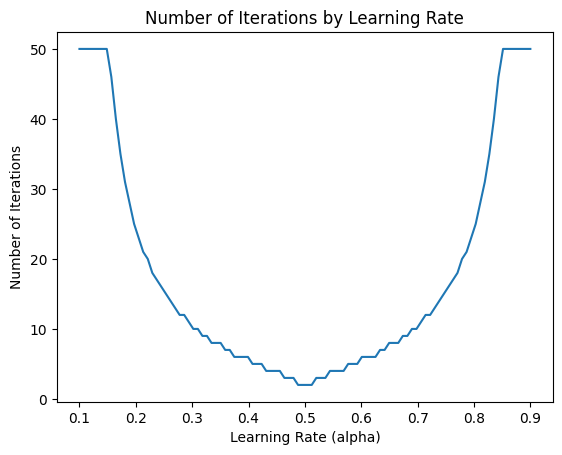

In [12]:
plt.plot(np.linspace(0.1, 0.9, 100), [gradient_descent_visualized(100, alpha=a, iters=50, show = False) for a in np.linspace(0.0, 1.0, 100)]);
plt.title('Number of Iterations by Learning Rate');
plt.xlabel('Learning Rate (alpha)');
plt.ylabel('Number of Iterations');


From the graph above we can see the direct relationship between Learning rate and the number of iterations needed to reach the global maxima. We see that in this case we have a optimal learning rate of 0.5 and then any increases or decreases in the rate increase the number of iterations needed until the algorthm gets stuck at 1 and 0. 

In [13]:
df = pd.read_csv("tips.csv")

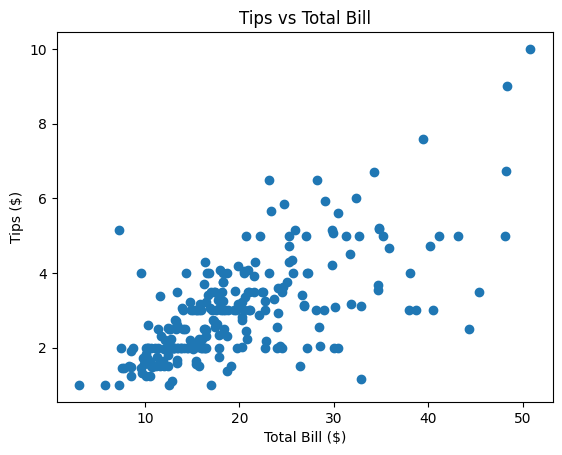

In [14]:
plt.scatter(df['total_bill'], df['tip']);
plt.xlabel('Total Bill ($)')
plt.ylabel('Tips ($)');
plt.title('Tips vs Total Bill');

**Following the Data Science Process**
We can see that there appears to be a linear relationship between tips and total bill hence:
1. **Choose a Model**: $Tips = \theta_1TotalBill$
2. **Choose a Loss Function**: $L(\theta_1) = 1/n\sum_{n=1}^{n}  L(\theta_1)_i$ where $L(\theta_1)_i = (tip_i - \theta_1x)^2$. This is the average error across the entire data set and can be computationally expensive to comptute.
3. **Minimizae Loss Funtion**: This can be achieved using gradient descent. 
4. **Evaluate Model Performance**: Visualize RMSE.


In [15]:
def tips_loss_function(theta_1):
    """Returns the MSE on our data for the given theta1"""
    x = tips["total_bill"]
    y_obs = tips["tip"]
    y_hat = theta_1 * x
    return np.mean((y_hat - y_obs) ** 2)


def tips_gradient(theta_1):
    """Returns the derivative of the MSE on our data for the given theta1"""
    x = tips["total_bill"]
    y_obs = tips["tip"]
    y_hat = theta_1 * x
    return np.mean(2 * (y_obs - y_hat)*x)


Final guess for theta_1: 0.14372941412717063


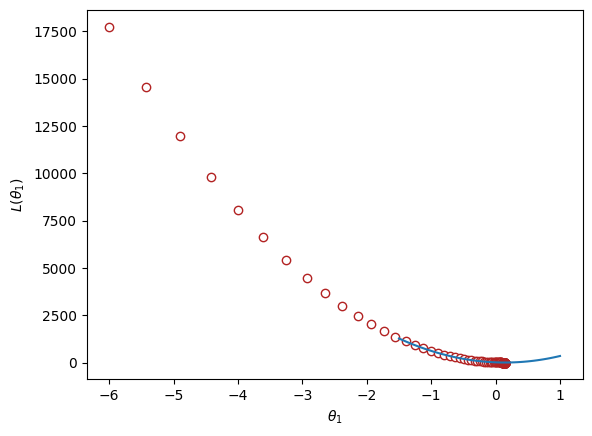

In [16]:
def gradient_descent(df, initial_guess, alpha, n):
    """Performs n steps of gradient descent on df using learning rate alpha starting
       from initial_guess. Returns a numpy array of all guesses over time."""
    guesses = [initial_guess]
    current_guess = initial_guess
    while len(guesses) < n:
        current_guess = current_guess - alpha * df(current_guess)
        guesses.append(current_guess)
        
    return np.array(guesses)

def mse_single_arg(theta_1):
    """Returns the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta_1 * x
    return np.mean((y_hat - y_obs) ** 2)

def mse_loss_derivative_single_arg(theta_1):
    """Returns the derivative of the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta_1 * x
    
    return np.mean(2 * (y_hat - y_obs) * x)

loss_df = pd.DataFrame({"theta_1":np.linspace(-1.5, 1), "MSE":[mse_single_arg(theta_1) for theta_1 in np.linspace(-1.5, 1)]})

trajectory = gradient_descent(mse_loss_derivative_single_arg, -6, 0.0001, 150)

plt.plot(loss_df["theta_1"], loss_df["MSE"])
plt.scatter(trajectory, [mse_single_arg(guess) for guess in trajectory], c="white", edgecolor="firebrick")
plt.scatter(trajectory[-1], mse_single_arg(trajectory[-1]), c="firebrick")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$L(\theta_1)$");

print(f"Final guess for theta_1: {trajectory[-1]}")
theta = trajectory[-1]

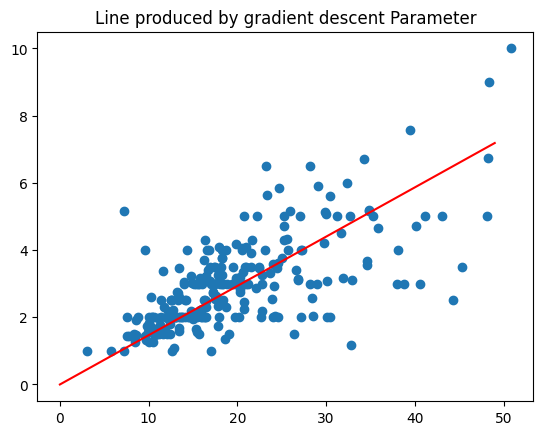

In [17]:
plt.scatter(df['total_bill'], df['tip']);
plt.plot(theta*np.linspace(start = 0, stop = 50), color = 'red');
plt.title('Line produced by gradient descent Parameter');


The algorithm above is batch gradient descent. For each new parameter value, the average loss across the whole dataset is computed. For large datasets with say a billion data points, recomputing the loss across the entire dataset each iteration is very taxing. Another option is stochastic gradient descent where you sample randomly from your data, compute a gradient from the sample and use that move more quickly if less deterministicly towards the global minimum. In stochastic gradient descent you choose a batch size, the size of your sample without replacement until you have passed throught the entire training set completing one training epoch. 